In [43]:
import numpy as np
import os
import kaggle
import shutil
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
pip install kaggle

In [83]:
def download_dataset(kaggle_dataset, download_path):
    if not os.path.exists(download_path):
        os.makedirs(download_path)
        kaggle.api.dataset_download_files(kaggle_dataset, path=download_path, unzip=True)
        print(f"Dataset downloaded to {download_path}")
        
        original_path = os.path.join(download_path, 'Skin Cancer Dataset')
        if os.path.exists(original_path):
            new_path = os.path.join(download_path, 'Skin Cancer Dataset')
            shutil.move(original_path, new_path)
            print(f"Moved the dataset to {new_path}")
    else:
        print(f"Dataset already exists at {download_path}. Skipping download.")

def load_images_and_labels(dataset_path, image_size=(224, 224)):
    images = []
    labels = []
    
    dataset_path = os.path.join(dataset_path, 'Skin Cancer Dataset') 
    
    for label_dir in os.listdir(dataset_path):
        label_dir_path = os.path.join(dataset_path, label_dir)
        
        if os.path.isdir(label_dir_path):
            for img_name in os.listdir(label_dir_path):
                img_path = os.path.join(label_dir_path, img_name)
                
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    try:
                        img = Image.open(img_path).convert("RGB")
                        img = img.resize(image_size)
                        images.append(img)
                        labels.append(label_dir)
                    except Exception as e:
                        print(f"Could not load image {img_name}: {e}")
                        
    return images, labels

# creating directories for train, validation, test datasets
def create_directories(base_path, disease_labels):
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(base_path, split)
        if not os.path.exists(split_path):
            os.makedirs(split_path)
        
        # Creating subdirectories for each disease label
        for label in disease_labels:
            label_path = os.path.join(split_path, label)
            if not os.path.exists(label_path):
                os.makedirs(label_path)

# copy images to correct directories
def copy_images_to_directories(images, labels, label_encoder, base_path):
    data = list(zip(images, labels))
    random.shuffle(data)
    images, labels = zip(*data)
    
    disease_labels = label_encoder.classes_

    # Split data into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    create_directories(base_path, disease_labels)

    # copy images based on split
    def copy_split_images(split, images, labels):
        split_map = {'train': X_train, 'val': X_val, 'test': X_test}
        for i, image in enumerate(split_map[split]):
            label = labels[i]
            label_index = label_encoder.transform([label])[0]
            disease_label = disease_labels[label_index]
            
            split_dir = os.path.join(base_path, split, disease_label)
            image.save(os.path.join(split_dir, f"{split}_{i}.jpg"))

    
    for split in ['train', 'val', 'test']:
        copy_split_images(split, images, labels)

download_path = 'data/'

kaggle_dataset = 'pritpal2873/multiple-skin-disease-detection-and-classification'
download_dataset(kaggle_dataset, download_path)

images, labels = load_images_and_labels(download_path)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

base_directory = 'data/Skin_Cancer_Split'

copy_images_to_directories(images, labels, label_encoder, base_directory)


Dataset already exists at data/. Skipping download.


In [32]:
# def load_images_and_labels(dataset_path, image_size=(224, 224)):
#     images = []
#     labels = []
    
#     for label_dir in os.listdir(dataset_path):
#         label_dir_path = os.path.join(dataset_path, label_dir)
        
#         if os.path.isdir(label_dir_path):
#             for img_name in os.listdir(label_dir_path):
#                 img_path = os.path.join(label_dir_path, img_name)
                
#                 if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
#                     try:
#                         img = Image.open(img_path).convert("RGB")
                        
#                         img = img.resize(image_size)
                        
#                         images.append(img)
#                         labels.append(label_dir)
#                     except Exception as e:
#                         print(f"Could not load image {img_name}: {e}")
                        
#     return images, labels

# dataset_path = "data/Skin Cancer Dataset"

# images, labels = load_images_and_labels(dataset_path)

# label_encoder = LabelEncoder()
# labels_encoded = label_encoder.fit_transform(labels)

# # Split the data into train, validation, and test sets (80% train, 10% validation, 10% test)
# X_train, X_temp, y_train, y_temp = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Now we have:
# # X_train, y_train for training the model
# # X_val, y_val for tuning the model during training (hyperparameter selection, early stopping etc)
# # X_test, y_test for final evaluation after training


In [77]:
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Val set size: {len(X_val)}")

Training set size: 3285
Test set size: 411
Val set size: 411


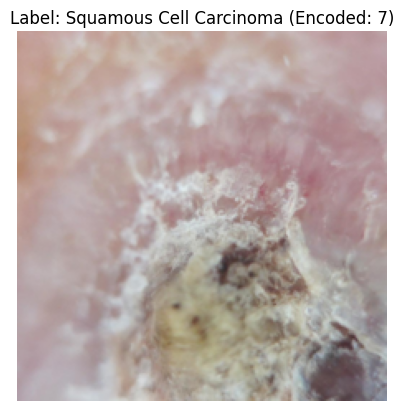

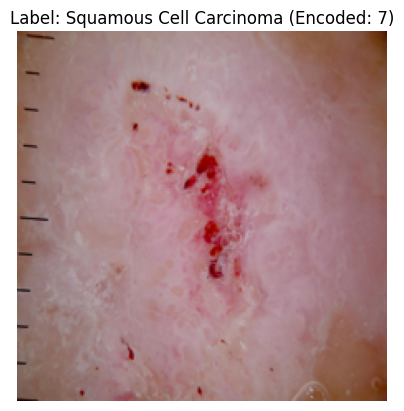

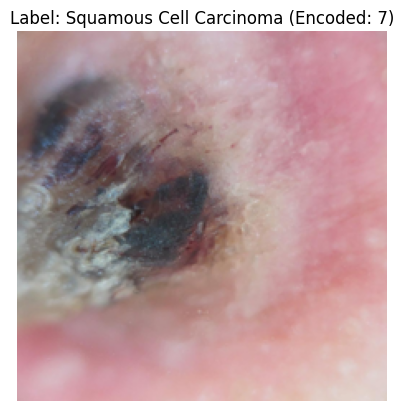

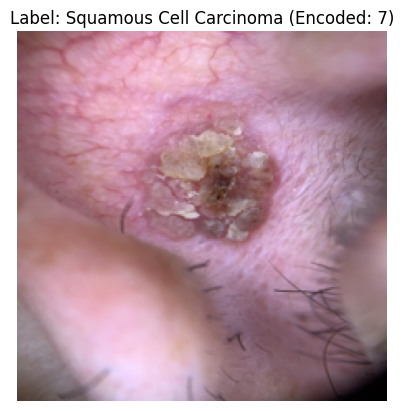

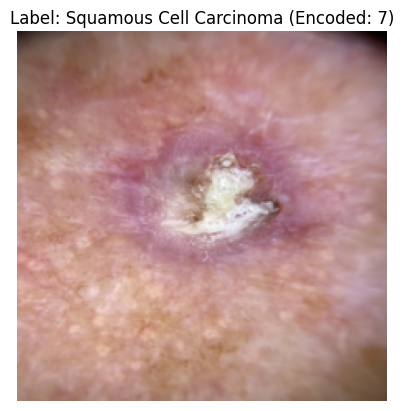

In [78]:
# loading few images for testing
for i in range(5): 
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]} (Encoded: {labels_encoded[i]})")
    plt.axis('off')
    plt.show()


In [79]:
#shape of the first image
print(f"Shape of the first image: {images[0].size}")
print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")

Shape of the first image: (224, 224)
Number of images: 4107
Number of labels: 4107


In [80]:
#unique labels and their encoded values
print("Unique labels:", label_encoder.classes_)
print("Encoded labels:", labels_encoded[:5]) 

Unique labels: ['Acitinic Keratosis' 'Basal Cell Carcinoma' 'Dermatofibroma' 'Melanoma'
 'Nevus' 'Pigmented Benign Keratosis' 'Seborrheic Keratosis'
 'Squamous Cell Carcinoma' 'Vascular Lesion']
Encoded labels: [7 7 7 7 7]


In [81]:
#first few image paths and their labels
for i in range(5):
    print(f"Image: {images[i]} - Label: {labels[i]} (Encoded: {labels_encoded[i]})")

Image: <PIL.Image.Image image mode=RGB size=224x224 at 0x7F7840242470> - Label: Squamous Cell Carcinoma (Encoded: 7)
Image: <PIL.Image.Image image mode=RGB size=224x224 at 0x7F7840241660> - Label: Squamous Cell Carcinoma (Encoded: 7)
Image: <PIL.Image.Image image mode=RGB size=224x224 at 0x7F7840241570> - Label: Squamous Cell Carcinoma (Encoded: 7)
Image: <PIL.Image.Image image mode=RGB size=224x224 at 0x7F78402433D0> - Label: Squamous Cell Carcinoma (Encoded: 7)
Image: <PIL.Image.Image image mode=RGB size=224x224 at 0x7F7840242D40> - Label: Squamous Cell Carcinoma (Encoded: 7)


In [82]:
#Distribution of labels in the split data
print("Training label distribution:", np.bincount(y_train))
print("Test label distribution:", np.bincount(y_test))

Training label distribution: [417 399 323 416 403 400 388 310 229]
Test label distribution: [37 52 42 47 42 48 60 52 31]
